Here, we implement some of the famous collaborative filtering methods and compare the results. The dataset is from Netflix movie database which has movie ratings for a lot of users. We have installed and used the "surprise" library which has lots of commands for the recommender system implementations

First, we have to import required methods from the library

In [ ]:
!pip install surprise

     |████████████████████████████████| 11.8MB 212kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617616 sha256=959a7e3c7985093911484de040385ee4b7853b0b1d1e35dbcf3d5b57551a6752
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
from surprise import SVD, NMF, Dataset, accuracy, KNNBasic
from surprise.model_selection import train_test_split

Here, we use the movie lens dataset, from Netflix

In [ ]:
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] Y
Trying to download dataset from http://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


25 percent of the data is used for testing the algorithm

In [ ]:
trainset, testset = train_test_split(data, test_size=.25)

The first recommender system is initiated based on SVD and is trained and tested by the train and test datasets, respectively

In [ ]:
algoSVD = SVD()
algoSVD.fit(trainset)
predictSVD = algoSVD.test(testset)

The second recommender system is based on matrix factorization.

In [ ]:
algoMF =NMF()
algoMF.fit(trainset)
predictMF = algoMF.test(testset)

The third recommender system is based on the cosine similarity of the items.

In [ ]:
sim_options = {'name': 'cosine',
               'user_based': False  # compute  similarities between items
               }
algoCosItem = KNNBasic(sim_options=sim_options)
algoCosItem.fit(trainset)
predictCosItem = algoCosItem.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


The fourth recommender system is based on the cosine similarity of the users.

In [ ]:
sim_options = {'name': 'cosine',
               'user_based': True  # compute  similarities between users
               }
algoCosUser = KNNBasic(sim_options=sim_options)
algoCosUser.fit(trainset)
predictCosUser = algoCosUser.test(testset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


The fifth recommender system is based on the Pearson correlation of items

In [ ]:
sim_options = {'name': 'pearson_baseline',
               'user_based': False  # compute  similarities between users
               }
algoPearItem = KNNBasic(sim_options=sim_options)
algoPearItem.fit(trainset)
predictPearItem = algoPearItem.test(testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


The sixth recommender system is based on the Pearson correlation of users

In [ ]:
sim_options = {'name': 'pearson_baseline',
               'user_based': True  # compute  similarities between users
               }
algoPearUser = KNNBasic(sim_options=sim_options)
algoPearUser.fit(trainset)
predictPearUser = algoPearUser.test(testset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


**Root Mean Square Error**

In [ ]:
rmseSVD = accuracy.rmse(predictSVD, verbose=False)
print("RMSE of the SVD algorithm is:", rmseSVD)
rmseMF= accuracy.rmse(predictMF, verbose=False)
print("RMSE of the MF algorithm is:",rmseMF)
rmseCosItem = accuracy.rmse(predictCosItem, verbose=False)
print("RMSE of the items Cosine similarity is:",rmseCosItem)
rmseCosUser = accuracy.rmse(predictCosUser, verbose=False)
print("RMSE of the users Cosine similarity is:", rmseCosUser)
rmsePearItem = accuracy.rmse(predictPearItem, verbose=False)
print("RMSE of the items Pearson similarity is:", rmsePearItem)
rmsePearUser = accuracy.rmse(predictPearUser, verbose=False)
print("RMSE of the users Pearson similarity is:", rmsePearUser)

RMSE of the SVD algorithm is: 0.9406864843097941
RMSE of the MF algorithm is: 0.9700905637558626
RMSE of the items Cosine similarity is: 1.0350823481779798
RMSE of the users Cosine similarity is: 1.0232467945169805
RMSE of the items Pearson similarity is: 1.0008502789978408
RMSE of the users Pearson similarity is: 1.011287269800196


**Mean Absolute Error**

In [ ]:
maeSVD = accuracy.mae(predictSVD, verbose=False)
print("MAE of the SVD algorithm is:", maeSVD)
maeMF = accuracy.mae(predictMF, verbose=False)
print("MAE of the MF algorithm is:", maeMF)
maeCosItem = accuracy.mae(predictCosItem, verbose=False)
print("MAE of the items Cosine similarity is:", maeCosItem)
maeCosUser = accuracy.mae(predictCosUser, verbose=False)
print("MAE of the users Cosine similarity is:", maeCosUser)
maePearItem = accuracy.mae(predictPearItem, verbose=False)
print("MAE of the items Pearson similarity is:", maePearItem)
maePearUser = accuracy.mae(predictPearUser, verbose=False)
print("MAE of the users Pearson similarity is:", maePearUser)

MAE of the SVD algorithm is: 0.7421526582650736
MAE of the MF algorithm is: 0.7613004386822028
MAE of the items Cosine similarity is: 0.8204353892989631
MAE of the users Cosine similarity is: 0.8095395173966001
MAE of the items Pearson similarity is: 0.7884223550815291
MAE of the users Pearson similarity is: 0.8003304905748142


**Fraction of Concordant Pairs**

In [ ]:
fcpSVD = accuracy.fcp(predictSVD, verbose=False)
print("FCP of the SVD algorithm is:", fcpSVD)
fcpMF = accuracy.fcp(predictMF, verbose=False)
print("FCP of the MF algorithm is:", fcpMF)
fcpCosItem = accuracy.fcp(predictCosItem, verbose=False)
print("FCP of the items Cosine similarity is:", fcpCosItem)
fcpCosUser = accuracy.fcp(predictCosUser, verbose=False)
print("FCP of the users Cosine similarity is:", fcpCosUser)
fcpPearItem = accuracy.fcp(predictPearItem, verbose=False)
print("FCP of the items Pearson similarity is:", fcpPearItem)
fcpPearUser = accuracy.fcp(predictPearUser, verbose=False)
print("FCP of the users Pearson similarity is:", fcpPearUser)

FCP of the SVD algorithm is: 0.6959906839954711
FCP of the MF algorithm is: 0.6862062165968371
FCP of the items Cosine similarity is: 0.5759330127108423
FCP of the users Cosine similarity is: 0.7030740698715033
FCP of the items Pearson similarity is: 0.6611224827288038
FCP of the users Pearson similarity is: 0.7112911246827982


**Tuning Parameters and Evaluating SVD**

All the above-mentioned algorithms can be tuned by their parameters. As an example, here we focus on SVD. One of the important parameter in the SVD algorithm is the number of factors which we can play with and tune. In the beginning of this script, we use the default value of the number of factor which has been set to 100 by default. But now, we try the same SVD algorithm for different number of factors to check the errors.

In [ ]:
#Importing more libraries
import os
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [ ]:
k_factors = [5, 10, 25, 50, 75, 100]
test_rmse = []
algo = SVD()
for k in k_factors:
    algo = SVD(n_factors=k, verbose=False)
    algo.fit(trainset)
    predictions = algo.test(testset)
    error = accuracy.rmse(predictions, verbose = False)
    test_rmse.append(error)
error_data = {'k': k_factors, 'error': test_rmse}
pd.DataFrame(error_data)

,k,error
0,5,0.942237
1,10,0.938503
2,25,0.937115
3,50,0.942100
4,75,0.943164
5,100,0.939489


Also, we can depict how the errors of the test set variates with the number of factors.

In [ ]:
def plot_model_rmse(xs, ys, title, x_label, y_label):
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize = (10, 5))
    ax.plot(xs, ys, marker = 'o')
    for x,y in zip(xs,ys):
        label = "{:.2f}".format(y)
        plt.annotate(label, (x,y), textcoords="offset points", xytext=(0,10), ha='center')
    
    plt.title(title, fontsize = 12)
    plt.xlabel(x_label, fontsize = 10)
    plt.ylabel(y_label, fontsize = 10)
    plt.draw()

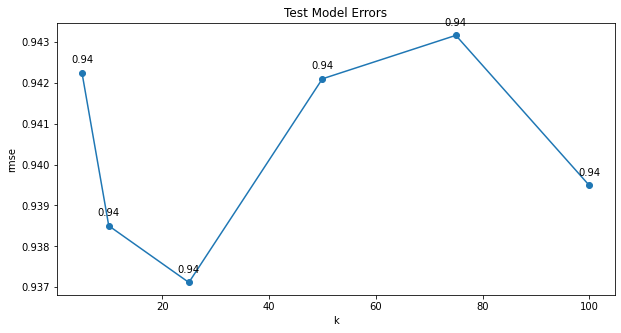

In [ ]:
plot_model_rmse(error_data['k'], error_data['error'], 'Test Model Errors', 'k', 'rmse')

**Recall, Precision, and F1-Score**

The other three important performance measure that we can apply, are recall, precision, and f1-score.

In [ ]:
# Return precision and recall at k metrics for each user
def precision_recall_at_k(predictions, k = 10, threshold = 3.5):
    
    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        
        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        
        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        
        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        
        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])
        
        # Precision@K: Proportion of recommended items that are relevant
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        
        # Recall@K: Proportion of relevant items that are recommended
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1
    
    return precisions, recalls;

In [ ]:
def get_precision_vs_recall(data_train, data_test, algo, vecK, verbose = False):
    precision_list = []
    recall_list = []
    f1_score_list = []   
    if algo:
        for k_curr in vecK:
            algo.fit(data_train)
            predictions = algo.test(data_test)   
            
            # Get precision and recall at k metrics for each user
            precisions, recalls = precision_recall_at_k(predictions, k = k_curr, threshold = 4)
            
            # Averaged over all users
            precision = sum(prec for prec in precisions.values()) / len(precisions)
            recall = sum(rec for rec in recalls.values()) / len(recalls)
            f1_score = 2 * (precision * recall) / (precision + recall)
            
            # Save measures
            precision_list.append(precision)
            recall_list.append(recall)
            f1_score_list.append(f1_score)
            
            if verbose:
                #print('K =', k_curr, '- Precision:', precision, ', Recall:', recall, ', F1 score:', f1_score)
                print("K = {}, Precision = {:.2f}, Recall = {:.2f}, F1 score = {:.2f}".format(k_curr, precision, recall, f1_score))
    
    return {'precision': precision_list, 'recall': recall_list, 'f1_score': f1_score_list};

**SVD**

In [ ]:
k_values = range(1,20)
metricsSVD = get_precision_vs_recall(trainset, testset, SVD(), k_values, True)

K = 1, Precision = 0.90, Recall = 0.09, F1 score = 0.17
K = 2, Precision = 0.89, Recall = 0.14, F1 score = 0.25
K = 3, Precision = 0.88, Recall = 0.18, F1 score = 0.29
K = 4, Precision = 0.88, Recall = 0.21, F1 score = 0.34
K = 5, Precision = 0.87, Recall = 0.23, F1 score = 0.36
K = 6, Precision = 0.87, Recall = 0.24, F1 score = 0.38
K = 7, Precision = 0.87, Recall = 0.26, F1 score = 0.40
K = 8, Precision = 0.86, Recall = 0.27, F1 score = 0.41
K = 9, Precision = 0.87, Recall = 0.28, F1 score = 0.43
K = 10, Precision = 0.87, Recall = 0.28, F1 score = 0.43
K = 11, Precision = 0.85, Recall = 0.29, F1 score = 0.43
K = 12, Precision = 0.86, Recall = 0.30, F1 score = 0.44
K = 13, Precision = 0.86, Recall = 0.31, F1 score = 0.45
K = 14, Precision = 0.86, Recall = 0.30, F1 score = 0.45
K = 15, Precision = 0.86, Recall = 0.31, F1 score = 0.46
K = 16, Precision = 0.86, Recall = 0.31, F1 score = 0.45
K = 17, Precision = 0.86, Recall = 0.31, F1 score = 0.46
K = 18, Precision = 0.86, Recall = 0.32,

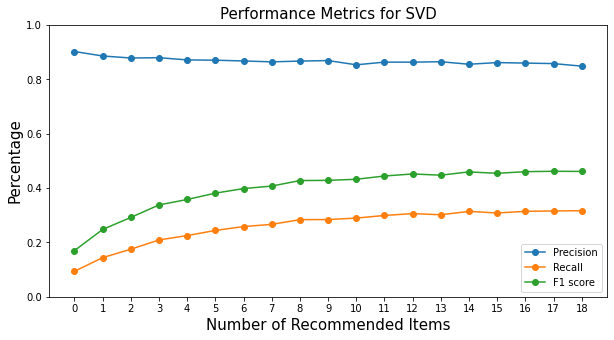

In [ ]:
# Get data
c1_SVD = metricsSVD['precision']
c2_SVD = metricsSVD['recall']
c3_SVD = metricsSVD['f1_score']
x_SVD = np.arange(len(c1_SVD))

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x_SVD), max(x_SVD) + 1, 1.0))
plt.ylim(0, 1)
ax1.plot(x_SVD, c1_SVD, marker = 'o')
ax1.plot(x_SVD, c2_SVD, marker = 'o')
ax1.plot(x_SVD, c3_SVD, marker = 'o')
#ax1.axvline(x = 10, color = "#8b0000", linestyle = "--")

# Chart setup
plt.title("Performance Metrics for SVD", fontsize = 15)
plt.xlabel("Number of Recommended Items", fontsize = 15)
plt.ylabel("Percentage", fontsize = 15)
plt.legend(("Precision", "Recall", "F1 score"), loc = "best")
plt.show()

**NMF**

In [ ]:
metricsNMF = get_precision_vs_recall(trainset, testset, NMF(), k_values, True)

K = 1, Precision = 0.86, Recall = 0.10, F1 score = 0.17
K = 2, Precision = 0.86, Recall = 0.15, F1 score = 0.26
K = 3, Precision = 0.86, Recall = 0.19, F1 score = 0.31
K = 4, Precision = 0.85, Recall = 0.21, F1 score = 0.33
K = 5, Precision = 0.84, Recall = 0.23, F1 score = 0.36
K = 6, Precision = 0.85, Recall = 0.24, F1 score = 0.38
K = 7, Precision = 0.85, Recall = 0.26, F1 score = 0.40
K = 8, Precision = 0.84, Recall = 0.27, F1 score = 0.41
K = 9, Precision = 0.85, Recall = 0.28, F1 score = 0.42
K = 10, Precision = 0.84, Recall = 0.30, F1 score = 0.44
K = 11, Precision = 0.84, Recall = 0.30, F1 score = 0.44
K = 12, Precision = 0.83, Recall = 0.30, F1 score = 0.45
K = 13, Precision = 0.85, Recall = 0.31, F1 score = 0.45
K = 14, Precision = 0.84, Recall = 0.31, F1 score = 0.45
K = 15, Precision = 0.83, Recall = 0.31, F1 score = 0.45
K = 16, Precision = 0.84, Recall = 0.32, F1 score = 0.46
K = 17, Precision = 0.84, Recall = 0.32, F1 score = 0.47
K = 18, Precision = 0.84, Recall = 0.32,

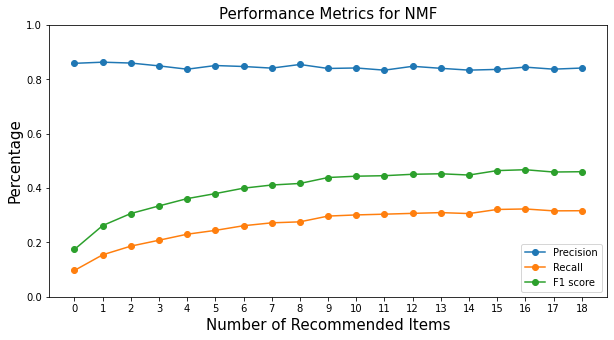

In [ ]:
c1_NMF = metricsNMF['precision']
c2_NMF = metricsNMF['recall']
c3_NMF = metricsNMF['f1_score']
x_NMF = np.arange(len(c1_NMF))

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x_NMF), max(x_NMF) + 1, 1.0))
plt.ylim(0, 1)
ax1.plot(x_NMF, c1_NMF, marker = 'o')
ax1.plot(x_NMF, c2_NMF, marker = 'o')
ax1.plot(x_NMF, c3_NMF, marker = 'o')

plt.title("Performance Metrics for NMF", fontsize = 15)
plt.xlabel("Number of Recommended Items", fontsize = 15)
plt.ylabel("Percentage", fontsize = 15)
plt.legend(("Precision", "Recall", "F1 score"), loc = "best")
plt.show()

Cosine Similarity of the Users

In [ ]:
metricsCosUser = get_precision_vs_recall(trainset, testset,algoCosUser, k_values, True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 1, Precision = 0.86, Recall = 0.11, F1 score = 0.19
Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 2, Precision = 0.84, Recall = 0.16, F1 score = 0.27
Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 3, Precision = 0.83, Recall = 0.20, F1 score = 0.32
Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 4, Precision = 0.83, Recall = 0.22, F1 score = 0.35
Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 5, Precision = 0.82, Recall = 0.24, F1 score = 0.38
Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 6, Precision = 0.82, Recall = 0.26, F1 score = 0.40
Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 7, Precision = 0.81, Recall = 0.28, F1 score = 0.41
Computing the cosine similarity matrix...
Done computing similarity matrix.


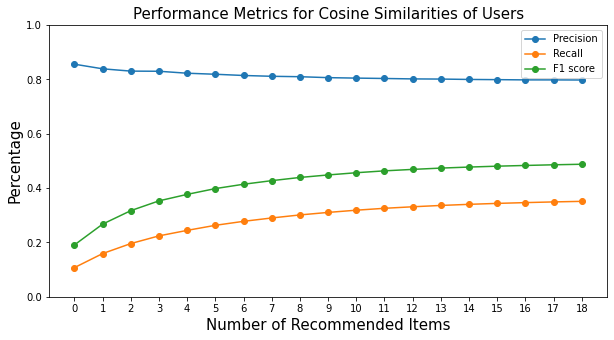

In [ ]:
c1_CosUser = metricsCosUser['precision']
c2_CosUser = metricsCosUser['recall']
c3_CosUser = metricsCosUser['f1_score']
x_CosUser = np.arange(len(c1_CosUser))

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x_CosUser), max(x_CosUser) + 1, 1.0))
plt.ylim(0, 1)
ax1.plot(x_CosUser, c1_CosUser, marker = 'o')
ax1.plot(x_CosUser, c2_CosUser, marker = 'o')
ax1.plot(x_CosUser, c3_CosUser, marker = 'o')

plt.title("Performance Metrics for Cosine Similarities of Users", fontsize = 15)
plt.xlabel("Number of Recommended Items", fontsize = 15)
plt.ylabel("Percentage", fontsize = 15)
plt.legend(("Precision", "Recall", "F1 score"), loc = "best")
plt.show()

In [ ]:
metricsCosItem = get_precision_vs_recall(trainset, testset,algoCosItem, k_values, True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 1, Precision = 0.93, Recall = 0.04, F1 score = 0.08
Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 2, Precision = 0.93, Recall = 0.06, F1 score = 0.12
Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 3, Precision = 0.93, Recall = 0.08, F1 score = 0.15
Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 4, Precision = 0.94, Recall = 0.10, F1 score = 0.18
Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 5, Precision = 0.93, Recall = 0.12, F1 score = 0.21
Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 6, Precision = 0.93, Recall = 0.13, F1 score = 0.23
Computing the cosine similarity matrix...
Done computing similarity matrix.
K = 7, Precision = 0.93, Recall = 0.15, F1 score = 0.25
Computing the cosine similarity matrix...
Done computing similarity matrix.


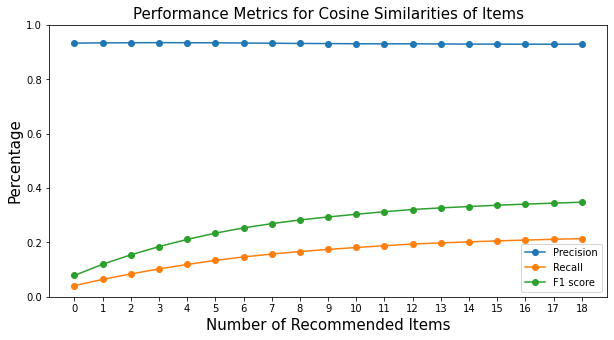

In [ ]:
c1_CosItem = metricsCosItem['precision']
c2_CosItem = metricsCosItem['recall']
c3_CosItem = metricsCosItem['f1_score']
x_CosItem = np.arange(len(c1_CosItem))

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x_CosItem), max(x_CosItem) + 1, 1.0))
plt.ylim(0, 1)
ax1.plot(x_CosItem, c1_CosItem, marker = 'o')
ax1.plot(x_CosItem, c2_CosItem, marker = 'o')
ax1.plot(x_CosItem, c3_CosItem, marker = 'o')

plt.title("Performance Metrics for Cosine Similarities of Items", fontsize = 15)
plt.xlabel("Number of Recommended Items", fontsize = 15)
plt.ylabel("Percentage", fontsize = 15)
plt.legend(("Precision", "Recall", "F1 score"), loc = "best")
plt.show()

In [ ]:
metricsPearUser = get_precision_vs_recall(trainset, testset,algoPearUser, k_values, True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
K = 1, Precision = 0.87, Recall = 0.11, F1 score = 0.19
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
K = 2, Precision = 0.86, Recall = 0.16, F1 score = 0.27
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
K = 3, Precision = 0.85, Recall = 0.20, F1 score = 0.32
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
K = 4, Precision = 0.85, Recall = 0.22, F1 score = 0.35
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
K = 5, Precision = 0.84, Recall = 0.24, F1 score = 0.38
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
K = 6, Precision =

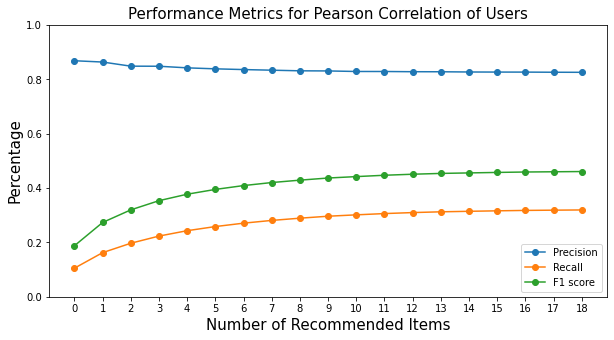

In [ ]:
c1_PearUser = metricsPearUser['precision']
c2_PearUser = metricsPearUser['recall']
c3_PearUser = metricsPearUser['f1_score']
x_PearUser = np.arange(len(c1_PearUser))

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x_PearUser), max(x_PearUser) + 1, 1.0))
plt.ylim(0, 1)
ax1.plot(x_PearUser, c1_PearUser, marker = 'o')
ax1.plot(x_PearUser, c2_PearUser, marker = 'o')
ax1.plot(x_PearUser, c3_PearUser, marker = 'o')

plt.title("Performance Metrics for Pearson Correlation of Users", fontsize = 15)
plt.xlabel("Number of Recommended Items", fontsize = 15)
plt.ylabel("Percentage", fontsize = 15)
plt.legend(("Precision", "Recall", "F1 score"), loc = "best")
plt.show()

In [ ]:
metricsPearItem = get_precision_vs_recall(trainset, testset, algoPearItem, k_values, True)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
K = 1, Precision = 0.87, Recall = 0.08, F1 score = 0.15
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
K = 2, Precision = 0.86, Recall = 0.12, F1 score = 0.22
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
K = 3, Precision = 0.86, Recall = 0.15, F1 score = 0.26
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
K = 4, Precision = 0.86, Recall = 0.18, F1 score = 0.30
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
K = 5, Precision = 0.86, Recall = 0.20, F1 score = 0.32
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
K = 6, Precision =

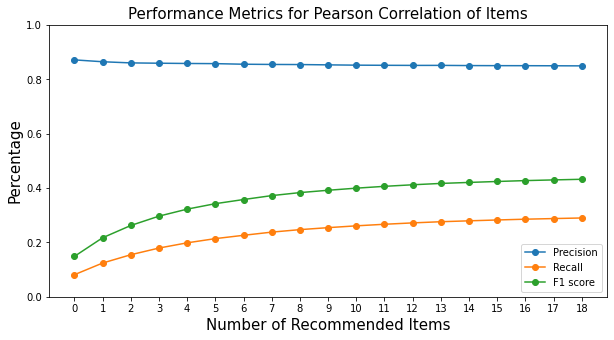

In [ ]:
c1_PearItem = metricsPearItem['precision']
c2_PearItem = metricsPearItem['recall']
c3_PearItem = metricsPearItem['f1_score']
x_PearItem = np.arange(len(c1_PearItem))

# Set up the matplotlib figure
fig, ax1 = plt.subplots(figsize = (10, 5))
plt.xticks(np.arange(min(x_PearItem), max(x_PearItem) + 1, 1.0))
plt.ylim(0, 1)
ax1.plot(x_PearItem, c1_PearItem, marker = 'o')
ax1.plot(x_PearItem, c2_PearItem, marker = 'o')
ax1.plot(x_PearItem, c3_PearItem, marker = 'o')

plt.title("Performance Metrics for Pearson Correlation of Items", fontsize = 15)
plt.xlabel("Number of Recommended Items", fontsize = 15)
plt.ylabel("Percentage", fontsize = 15)
plt.legend(("Precision", "Recall", "F1 score"), loc = "best")
plt.show()

**Comparing CF Algorithms**

**Precision**

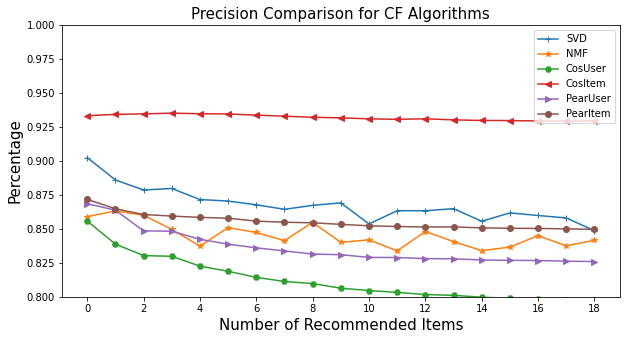

In [ ]:
fig, ax1 = plt.subplots(figsize = (10, 5))
plt.ylim(0.8, 1)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.plot(x_SVD, c1_SVD, marker = '+')
ax1.plot(x_NMF, c1_NMF, marker = '*')
ax1.plot(x_CosUser, c1_CosUser, marker = 'H')
ax1.plot(x_CosItem, c1_CosItem, marker = '<')
ax1.plot(x_PearUser, c1_PearUser, marker = '>')
ax1.plot(x_PearItem, c1_PearItem, marker = 'o')

plt.title("Precision Comparison for CF Algorithms", fontsize = 15)
plt.xlabel("Number of Recommended Items", fontsize = 15)
plt.ylabel("Percentage", fontsize = 15)
plt.legend(("SVD", "NMF", "CosUser", "CosItem", "PearUser", "PearItem"), loc = "best")


plt.show()

Recall

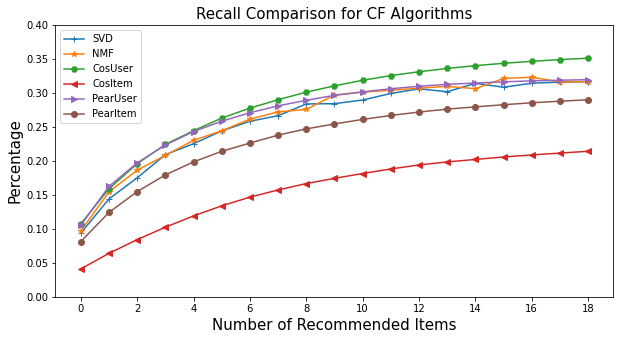

In [ ]:
fig, ax1 = plt.subplots(figsize = (10, 5))
plt.ylim(0, 0.4)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.plot(x_SVD, c2_SVD, marker = '+')
ax1.plot(x_NMF, c2_NMF, marker = '*')
ax1.plot(x_CosUser, c2_CosUser, marker = 'H')
ax1.plot(x_CosItem, c2_CosItem, marker = '<')
ax1.plot(x_PearUser, c2_PearUser, marker = '>')
ax1.plot(x_PearItem, c2_PearItem, marker = 'o')

plt.title("Recall Comparison for CF Algorithms", fontsize = 15)
plt.xlabel("Number of Recommended Items", fontsize = 15)
plt.ylabel("Percentage", fontsize = 15)
plt.legend(("SVD", "NMF", "CosUser", "CosItem", "PearUser", "PearItem"), loc = "best")
plt.show()

F1-Score

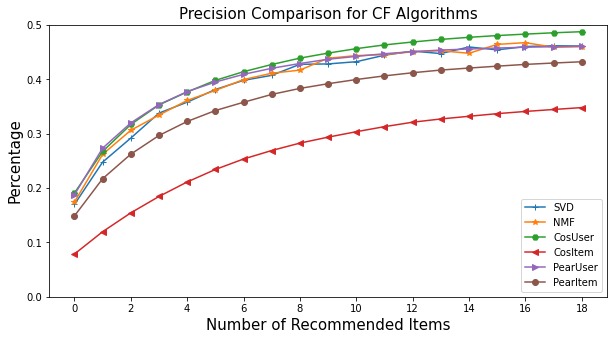

In [ ]:
fig, ax1 = plt.subplots(figsize = (10, 5))
plt.ylim(0, .5)
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.plot(x_SVD, c3_SVD, marker = '+')
ax1.plot(x_NMF, c3_NMF, marker = '*')
ax1.plot(x_CosUser, c3_CosUser, marker = 'H')
ax1.plot(x_CosItem, c3_CosItem, marker = '<')
ax1.plot(x_PearUser, c3_PearUser, marker = '>')
ax1.plot(x_PearItem, c3_PearItem, marker = 'o')

plt.title("Precision Comparison for CF Algorithms", fontsize = 15)
plt.xlabel("Number of Recommended Items", fontsize = 15)
plt.ylabel("Percentage", fontsize = 15)
plt.legend(("SVD", "NMF", "CosUser", "CosItem", "PearUser", "PearItem"), loc = "best")
plt.show()